In [2]:
from pandas import read_csv
import pandas as pd
import numpy as np
import plotly.graph_objects as go


import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure




#from matplotlib import pyplot

series = read_csv('dataset.csv', header=0, index_col=0, parse_dates=True, squeeze=True)



In [3]:
data= series.loc['Z8RsBpxhnkebK5fvahVCmfV7icO2']


In [4]:
data['time']=pd.to_datetime(data['time'], format='%Y-%m-%d %H:%M:%S')
data.set_index(['time'], inplace=True)

C:\Users\anto-\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [5]:
dataSugar = data[['sugarValue']]


dataSugar = dataSugar.drop(dataSugar[dataSugar.sugarValue > 300].index, inplace=False)

dataSugar= dataSugar.dropna()


C:\Users\anto-\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



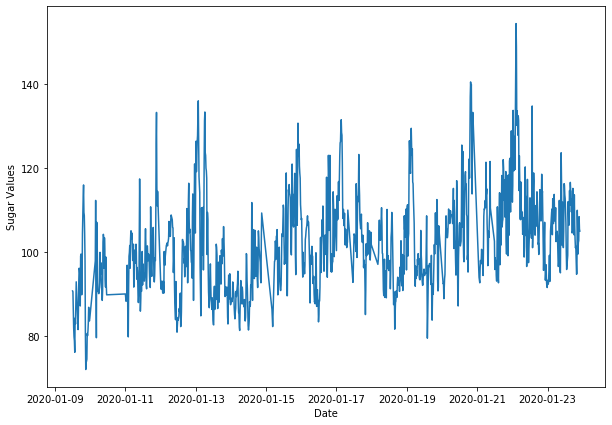

In [6]:
fig = plt.figure(figsize=(10,7))

plt.plot(dataSugar.dropna())
plt.ylabel('Sugar Values')
plt.xlabel('Date')
plt.show()


In [7]:
dataSugar


,sugarValue
time,
2020-01-09 12:00:00,90.82098
2020-01-09 12:15:00,90.61686
2020-01-09 12:30:00,86.22828
2020-01-09 12:45:00,82.04382
2020-01-09 13:00:00,79.90056
...,...
2020-01-23 21:00:00,102.35376
2020-01-23 21:15:00,102.76200
2020-01-23 21:30:00,108.47736


In [8]:
dataSugar =dataSugar.groupby(dataSugar.index.date).mean()


In [9]:
dataSugar.sugarValue = dataSugar.sugarValue.round()


In [10]:
train_size=int(len(dataSugar) *0.7)
test_size = int(len(dataSugar)) - train_size

train_X = dataSugar[:train_size].dropna()
test_X = dataSugar[train_size:].dropna()



In [11]:
lDay= dataSugar.tail(1).index.item()

C:\Users\anto-\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

`item` has been deprecated and will be removed in a future version



In [12]:
lDay

datetime.date(2020, 1, 23)

In [13]:
import datetime

datelist = pd.date_range(lDay+ datetime.timedelta(days=1), periods=7).strftime('%Y-%m-%d').tolist()


In [14]:
datelist

['2020-01-24',
 '2020-01-25',
 '2020-01-26',
 '2020-01-27',
 '2020-01-28',
 '2020-01-29',
 '2020-01-30']

In [15]:
from tbats import TBATS, BATS
# Fit the model
estimator = TBATS()
model = estimator.fit(train_X)
# Forecast 365 days ahead
y_forecast = model.forecast(steps=7)



pos = pd.DataFrame(list(zip(datelist, y_forecast)),columns =['index', 'sugarValue']) 
    

In [16]:
pos

,index,sugarValue
0,2020-01-24,106.313354
1,2020-01-25,105.366140
2,2020-01-26,106.431332
3,2020-01-27,107.496524
4,2020-01-28,108.561715
5,2020-01-29,109.626907
6,2020-01-30,110.692099


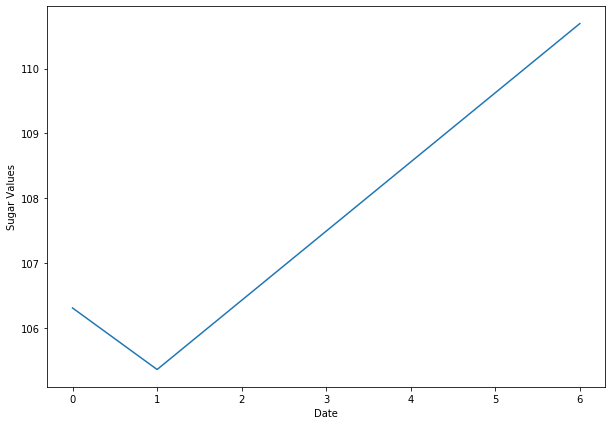

In [17]:
fig = plt.figure(figsize=(10,7))

plt.plot(y_forecast)
plt.ylabel('Sugar Values')
plt.xlabel('Date')
plt.show()

In [18]:
dataM =dataSugar.reset_index()




In [19]:
dataM

,index,sugarValue
0,2020-01-09,90.0
1,2020-01-10,96.0
2,2020-01-11,98.0
3,2020-01-12,98.0
4,2020-01-13,100.0
5,2020-01-14,92.0
6,2020-01-15,105.0
7,2020-01-16,100.0
8,2020-01-17,107.0
9,2020-01-18,97.0


In [27]:
pos

,sugarValue
index,
2020-01-24,106.313354
2020-01-25,105.366140
2020-01-26,106.431332
2020-01-27,107.496524
2020-01-28,108.561715
2020-01-29,109.626907
2020-01-30,110.692099


In [25]:
pos= pos.set_index(['index'], inplace=False)

In [21]:
bigdata = dataM.append(pos, ignore_index=True)


In [22]:

bigdata= bigdata.set_index(['index'], inplace=False)

In [23]:
bigdata

,sugarValue
index,
2020-01-09,90.000000
2020-01-10,96.000000
2020-01-11,98.000000
2020-01-12,98.000000
2020-01-13,100.000000
2020-01-14,92.000000
2020-01-15,105.000000
2020-01-16,100.000000
2020-01-17,107.000000


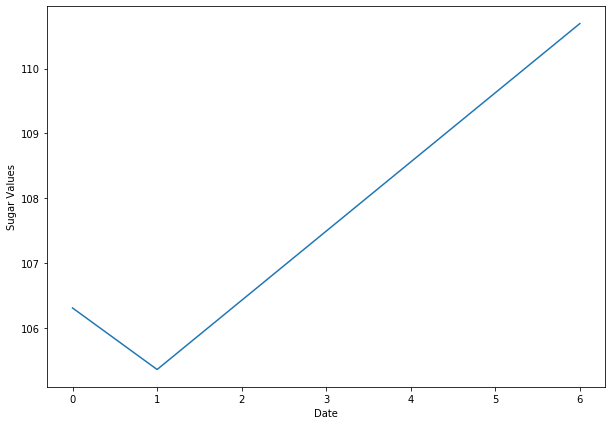

In [28]:
fig = plt.figure(figsize=(10,7))

plt.plot(pos.values)
plt.ylabel('Sugar Values')
plt.xlabel('Date')
plt.show()